In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-price-prediction/home_price.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

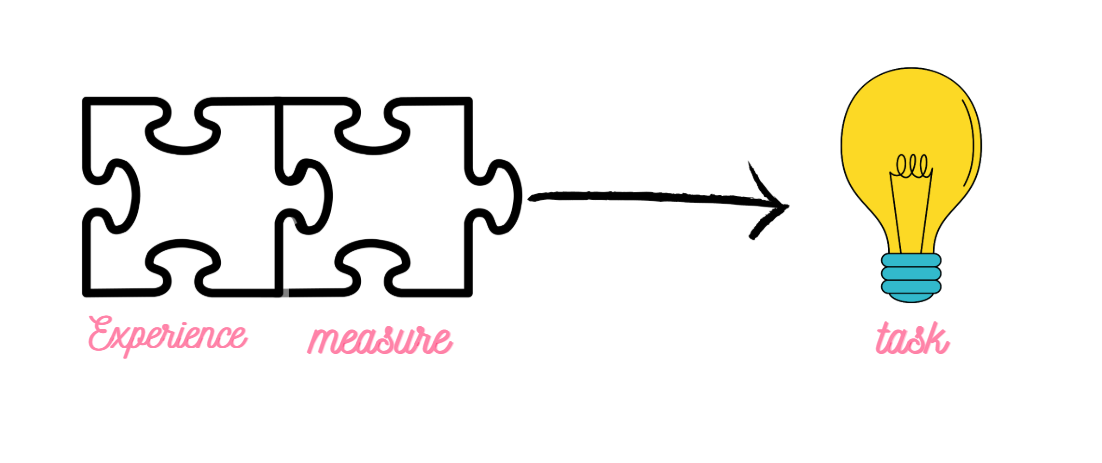

In [3]:
df=pd.read_csv('/kaggle/input/home-price-prediction/home_price.csv')

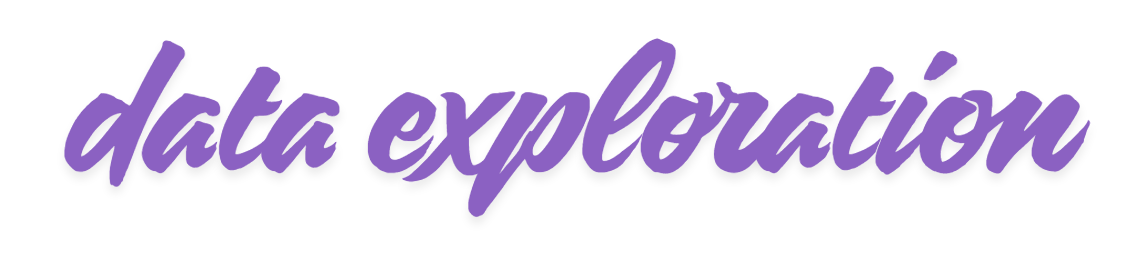

In [4]:
df.columns

Index(['price', 'age', 'landValue', 'livingArea', 'bedrooms', 'bathrooms',
       'rooms', 'heating', 'fuel', 'waterfront', 'newConstruction',
       'centralAir'],
      dtype='object')

age –
How old the house is.
→ Older houses might be cheaper unless they’re historic.

landValue –
How much the land alone is worth.
→ Valuable land usually increases house price.

livingArea –
The size of the house that people can live in.
→ Bigger homes usually cost more.

bedrooms –
Number of bedrooms in the house.
→ More bedrooms often mean higher price, but not always.

bathrooms –
Number of bathrooms.
→ More bathrooms can add value, especially in bigger houses.

rooms –
Total number of rooms (not just bedrooms).
→ Shows the overall size and layout of the house.

heating –
Type of heating system (like gas, electric, etc.).
→ Some types may be more modern or efficient.

fuel –
Type of fuel used for heating (like gas or oil).
→ Affects energy cost and buyer preference.

waterfront –
Is the house near a lake, river, or ocean?
→ Waterfront homes are usually more expensive.

newConstruction –
Is the house newly built?
→ New homes often sell for higher prices.

centralAir –
Does the house have central air conditioning?
→ Makes the house more comfortable, especially in hot areas.

In [5]:
df.duplicated().sum()

7

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 0 to 1727
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1721 non-null   int64  
 1   age              1721 non-null   int64  
 2   landValue        1721 non-null   int64  
 3   livingArea       1721 non-null   int64  
 4   bedrooms         1721 non-null   int64  
 5   bathrooms        1721 non-null   float64
 6   rooms            1721 non-null   int64  
 7   heating          1721 non-null   object 
 8   fuel             1721 non-null   object 
 9   waterfront       1721 non-null   object 
 10  newConstruction  1721 non-null   object 
 11  centralAir       1721 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 174.8+ KB


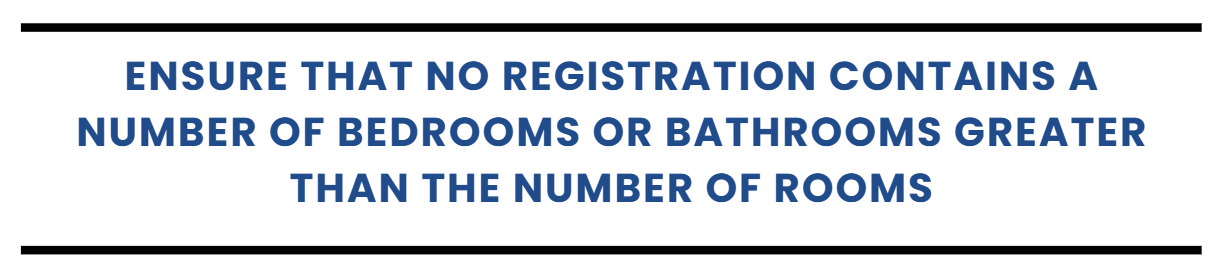

In [9]:
df[(df['rooms'] < df['bedrooms']) | (df['rooms'] < df['bathrooms'])].sum()

price                0
age                  0
landValue            0
livingArea           0
bedrooms             0
bathrooms          0.0
rooms                0
heating              0
fuel                 0
waterfront           0
newConstruction      0
centralAir           0
dtype: object

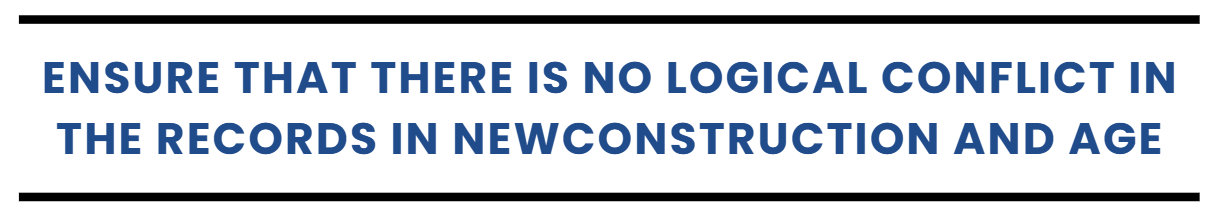

In [10]:
df[(df['age'] != 0) & (df['newConstruction'] == 1)].sum()

price                0
age                  0
landValue            0
livingArea           0
bedrooms             0
bathrooms          0.0
rooms                0
heating              0
fuel                 0
waterfront           0
newConstruction      0
centralAir           0
dtype: object

In [11]:
df.drop(columns=['newConstruction'], inplace=True)

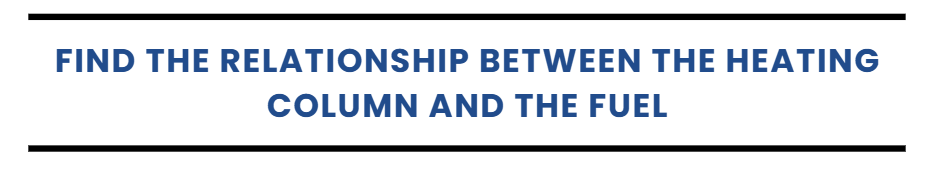

In [12]:
df.isnull().sum()

price         0
age           0
landValue     0
livingArea    0
bedrooms      0
bathrooms     0
rooms         0
heating       0
fuel          0
waterfront    0
centralAir    0
dtype: int64

In [13]:
df['fuel'].value_counts()


fuel
gas         1196
electric     309
oil          216
Name: count, dtype: int64

In [14]:
df['heating'].value_counts()

heating
hot air            1120
hot water/steam     302
electric            299
Name: count, dtype: int64

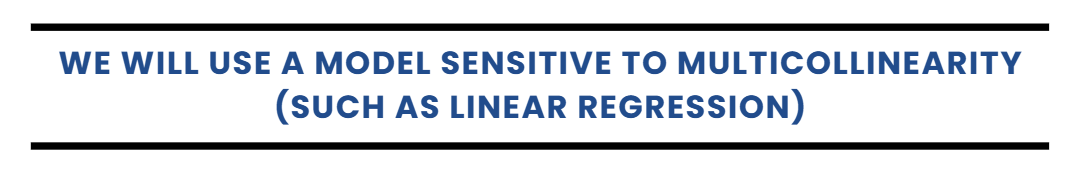

In [15]:
df.drop(columns=['fuel'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       1721 non-null   int64  
 1   age         1721 non-null   int64  
 2   landValue   1721 non-null   int64  
 3   livingArea  1721 non-null   int64  
 4   bedrooms    1721 non-null   int64  
 5   bathrooms   1721 non-null   float64
 6   rooms       1721 non-null   int64  
 7   heating     1721 non-null   object 
 8   waterfront  1721 non-null   object 
 9   centralAir  1721 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 147.9+ KB


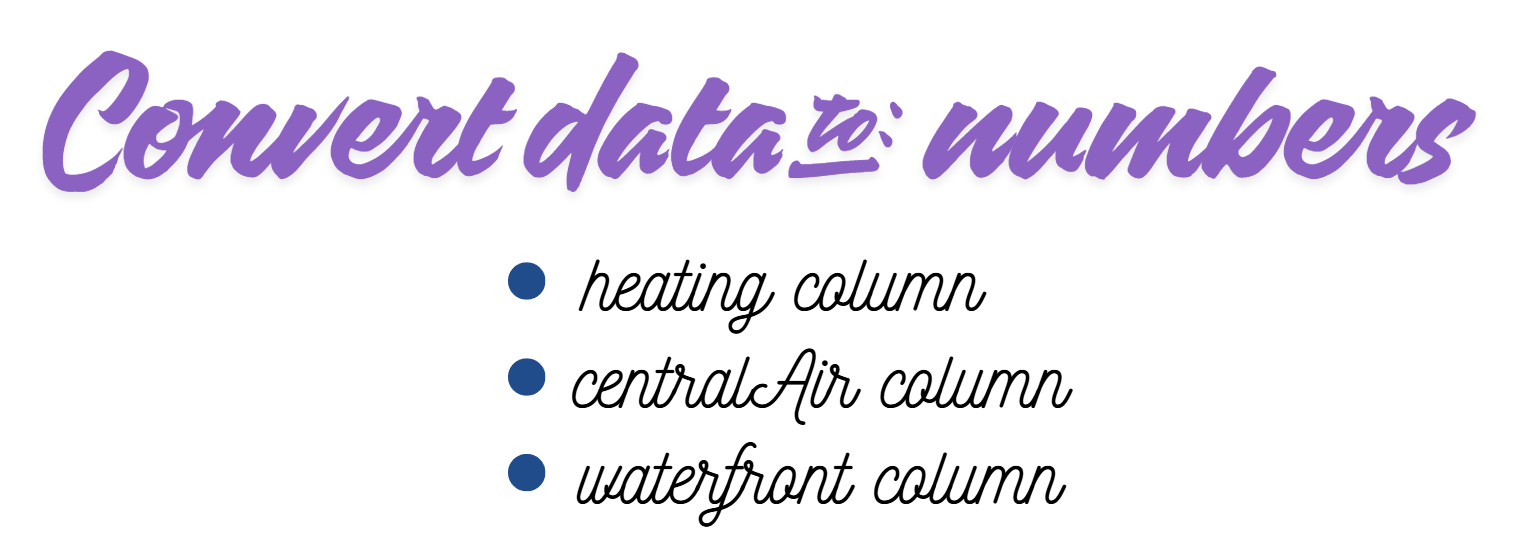

################################################################################################################

In [17]:
df['heating'].value_counts()

heating
hot air            1120
hot water/steam     302
electric            299
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder

heating_col = df[['heating']]

encoder = OneHotEncoder(sparse=False, drop=None)  

heating_encoded = encoder.fit_transform(heating_col)

heating_feature_names = encoder.get_feature_names_out(['heating'])

heating_encoded_df = pd.DataFrame(heating_encoded, columns=heating_feature_names, index=df.index)

df = pd.concat([df.drop(columns=['heating']), heating_encoded_df], axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
df

,price,age,landValue,livingArea,bedrooms,bathrooms,rooms,waterfront,centralAir,heating_electric,heating_hot air,heating_hot water/steam
0,132500,42,50000,906,2,1.0,5,No,No,1.0,0.0,0.0
1,181115,0,22300,1953,3,2.5,6,No,No,0.0,0.0,1.0
2,109000,133,7300,1944,4,1.0,8,No,No,0.0,0.0,1.0
3,155000,13,18700,1944,3,1.5,5,No,No,0.0,1.0,0.0
4,86060,0,15000,840,2,1.0,3,No,Yes,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,32,24200,2310,5,2.5,11,No,No,0.0,0.0,1.0
1724,285000,37,36200,2564,4,2.5,11,No,No,0.0,0.0,1.0
1725,194900,9,20400,1099,2,1.0,3,No,No,0.0,1.0,0.0
1726,125000,48,16800,1225,3,1.0,7,No,No,0.0,1.0,0.0


################################################################################################################

In [20]:
df['waterfront'].value_counts()

waterfront
No     1706
Yes      15
Name: count, dtype: int64

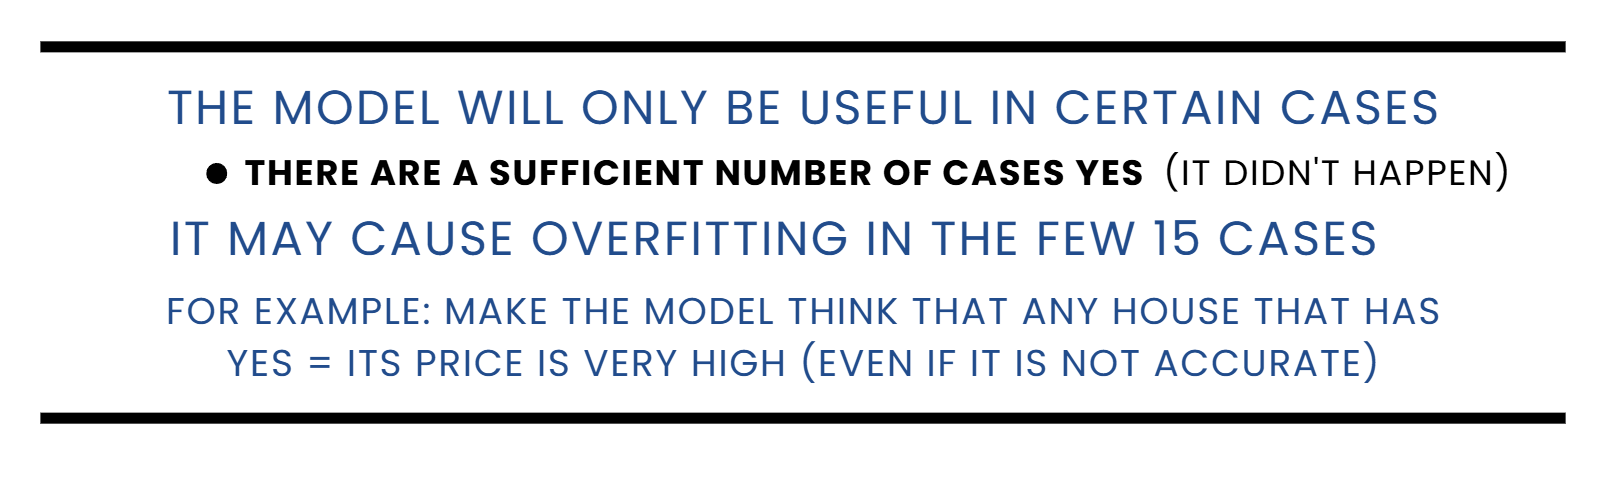

In [21]:
df.drop(columns=['waterfront'], inplace=True)

*################################################################################################################*

In [22]:
df['centralAir'].value_counts()

centralAir
No     1087
Yes     634
Name: count, dtype: int64

In [23]:
df['centralAir'] = df['centralAir'].map({'No': 0, 'Yes': 1})

################################################################################################################

In [24]:
df

,price,age,landValue,livingArea,bedrooms,bathrooms,rooms,centralAir,heating_electric,heating_hot air,heating_hot water/steam
0,132500,42,50000,906,2,1.0,5,0,1.0,0.0,0.0
1,181115,0,22300,1953,3,2.5,6,0,0.0,0.0,1.0
2,109000,133,7300,1944,4,1.0,8,0,0.0,0.0,1.0
3,155000,13,18700,1944,3,1.5,5,0,0.0,1.0,0.0
4,86060,0,15000,840,2,1.0,3,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,32,24200,2310,5,2.5,11,0,0.0,0.0,1.0
1724,285000,37,36200,2564,4,2.5,11,0,0.0,0.0,1.0
1725,194900,9,20400,1099,2,1.0,3,0,0.0,1.0,0.0
1726,125000,48,16800,1225,3,1.0,7,0,0.0,1.0,0.0


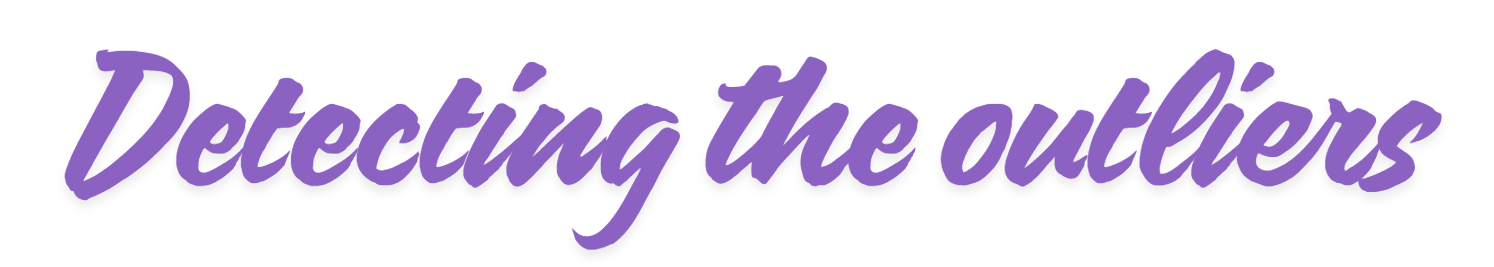

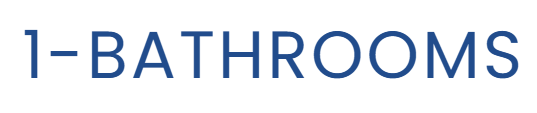

In [25]:
print(df['bathrooms'].value_counts())

bathrooms
2.5    549
1.5    492
1.0    323
2.0    255
3.0     56
3.5     36
4.0      8
4.5      1
0.0      1
Name: count, dtype: int64


In [26]:
df = df[df['bathrooms'] != 0]

In [27]:
print(df['bathrooms'].value_counts())

bathrooms
2.5    549
1.5    492
1.0    323
2.0    255
3.0     56
3.5     36
4.0      8
4.5      1
Name: count, dtype: int64


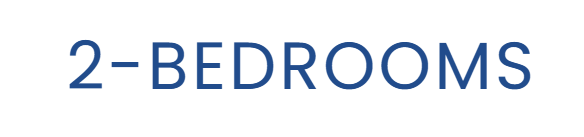

In [28]:
print(df['bedrooms'].min())
print(df['bedrooms'].max())

1
7


*No outliers*

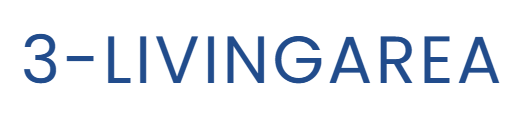

In [29]:
min_area_house = df.loc[df['livingArea'].idxmin(), ['livingArea', 'price']]
max_area_house = df.loc[df['livingArea'].idxmax(), ['livingArea', 'price']]
print(min_area_house)
print()
print(max_area_house)

livingArea       616.0
price         164900.0
Name: 656, dtype: float64

livingArea      5228.0
price         625000.0
Name: 313, dtype: float64


No outliers

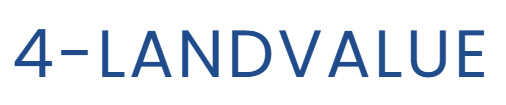

In [30]:
min_land_house = df.loc[df['landValue'].idxmin(), ['landValue', 'price']]
max_land_house = df.loc[df['landValue'].idxmax(), ['landValue', 'price']]
print(min_land_house)
print()
print(max_land_house)

landValue       200.0
price        315000.0
Name: 473, dtype: float64

landValue    412600.0
price        775000.0
Name: 701, dtype: float64


no outliers

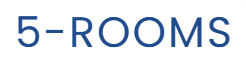

In [31]:
print(df['rooms'].min())
print(df['rooms'].max())

2
12


no outliers

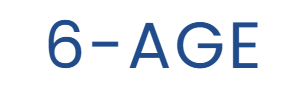

In [32]:
(df['age'] < 0).sum()

0

no outliers

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1720 entries, 0 to 1727
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1720 non-null   int64  
 1   age                      1720 non-null   int64  
 2   landValue                1720 non-null   int64  
 3   livingArea               1720 non-null   int64  
 4   bedrooms                 1720 non-null   int64  
 5   bathrooms                1720 non-null   float64
 6   rooms                    1720 non-null   int64  
 7   centralAir               1720 non-null   int64  
 8   heating_electric         1720 non-null   float64
 9   heating_hot air          1720 non-null   float64
 10  heating_hot water/steam  1720 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 225.8 KB


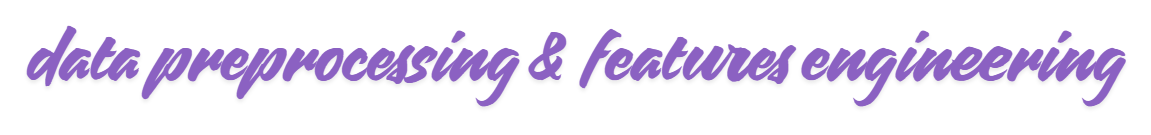

In [34]:
df

,price,age,landValue,livingArea,bedrooms,bathrooms,rooms,centralAir,heating_electric,heating_hot air,heating_hot water/steam
0,132500,42,50000,906,2,1.0,5,0,1.0,0.0,0.0
1,181115,0,22300,1953,3,2.5,6,0,0.0,0.0,1.0
2,109000,133,7300,1944,4,1.0,8,0,0.0,0.0,1.0
3,155000,13,18700,1944,3,1.5,5,0,0.0,1.0,0.0
4,86060,0,15000,840,2,1.0,3,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,32,24200,2310,5,2.5,11,0,0.0,0.0,1.0
1724,285000,37,36200,2564,4,2.5,11,0,0.0,0.0,1.0
1725,194900,9,20400,1099,2,1.0,3,0,0.0,1.0,0.0
1726,125000,48,16800,1225,3,1.0,7,0,0.0,1.0,0.0


In [35]:
df_model=df.copy()

In [36]:
df_model['price_per_sqft'] = df_model['price'] / df_model['livingArea']
 

print("\nColumns after feature engineering:", df_model.columns.tolist())


Columns after feature engineering: ['price', 'age', 'landValue', 'livingArea', 'bedrooms', 'bathrooms', 'rooms', 'centralAir', 'heating_electric', 'heating_hot air', 'heating_hot water/steam', 'price_per_sqft']


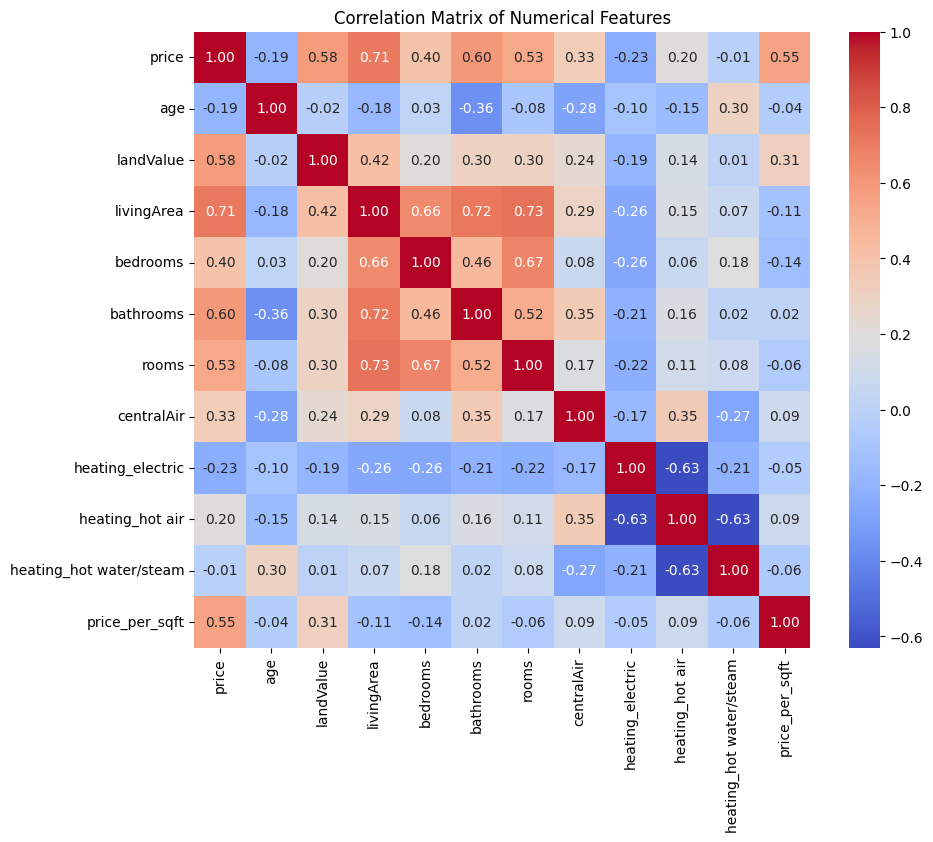

In [37]:
numeric_df = df_model.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


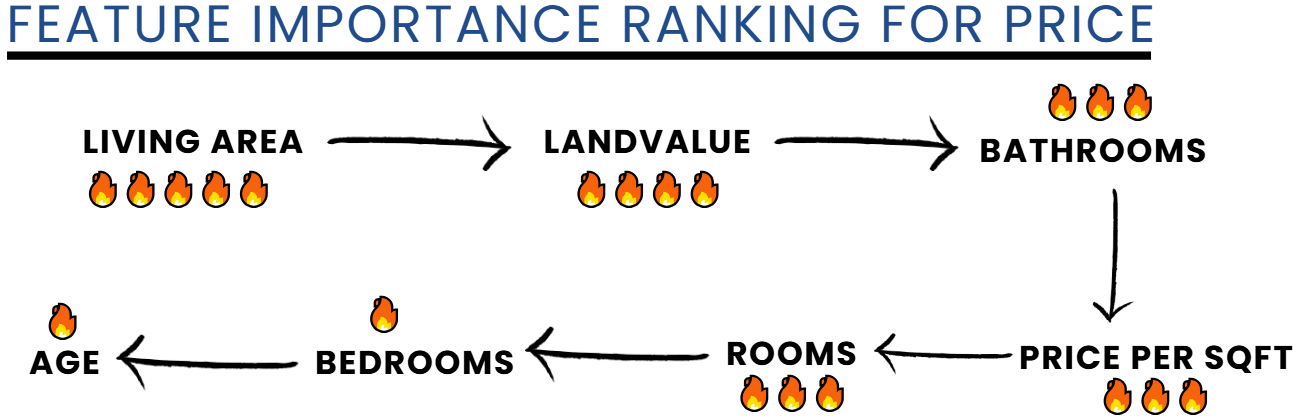

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaling_info = {
    'livingArea': (8, 17),    
    'landValue': (4,14), #more important than rooms
    'age':(2,5),
    'price_per_sqft': (3, 13) #more important than rooms and less importnant than landvalue
}


for column, range_vals in scaling_info.items():
    scaler = MinMaxScaler(feature_range=range_vals)
    df_model[[column]] = scaler.fit_transform(df_model[[column]])

In [40]:
df_model

,price,age,landValue,livingArea,bedrooms,bathrooms,rooms,centralAir,heating_electric,heating_hot air,heating_hot water/steam,price_per_sqft
0,132500,2.560000,5.207565,8.565915,2,1.0,5,0,1.0,0.0,0.0,4.712544
1,181115,2.000000,4.535887,10.609063,3,2.5,6,0,0.0,0.0,1.0,4.073081
2,109000,3.773333,4.172163,10.591500,4,1.0,8,0,0.0,0.0,1.0,3.634902
3,155000,2.173333,4.448594,10.591500,3,1.5,5,0,0.0,1.0,0.0,3.917676
4,86060,2.000000,4.358875,8.437121,2,1.0,3,1,0.0,1.0,0.0,4.189184
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,2.426667,4.581959,11.305724,5,2.5,11,0,0.0,0.0,1.0,4.459927
1724,285000,2.493333,4.872939,11.801388,4,2.5,11,0,0.0,0.0,1.0,4.293176
1725,194900,2.120000,4.489816,8.942541,2,1.0,3,0,0.0,1.0,0.0,5.084146
1726,125000,2.640000,4.402522,9.188422,3,1.0,7,0,0.0,1.0,0.0,4.184266


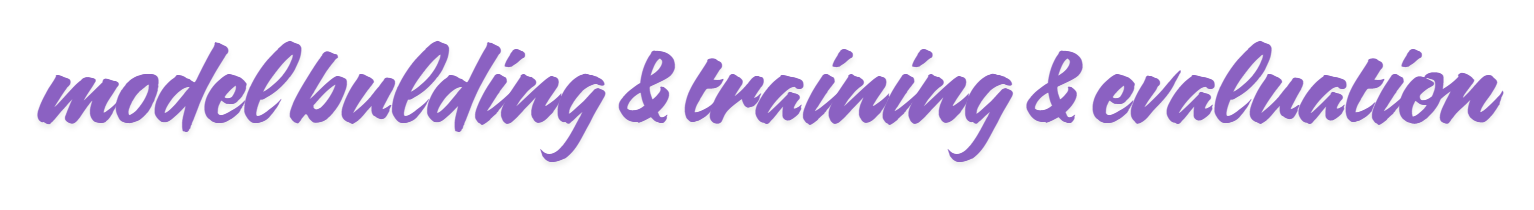

In [41]:
x = df_model.drop('price', axis=1)
y = df_model['price']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred_lr = model.predict(x_test)


print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R²:", r2_score(y_test, y_pred_lr))

MAE: 15110.377988651286
MSE: 721002594.9098477
RMSE: 26851.49148389802
R²: 0.9322948904756307


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)




print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", mean_squared_error(y_test, rf_pred, squared=False))
print("R²:", r2_score(y_test, rf_pred))

MAE: 5417.938691860465
RMSE: 16520.67892202822
R²: 0.974370484354919


In [46]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor(n_neighbors=10)

knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("MAE:", mae_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("R²:", r2_knn)

MAE: 34113.943895348835
MSE: 2846883239.227064
RMSE: 53356.192135749945
R²: 0.7326659531106678


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 5985.820423230667
MSE: 128161012.4541096
RMSE: 11320.822075013351
R²: 0.9879651537370063


In [48]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)


mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 5416.6201626090115
MSE: 229686198.187827
RMSE: 15155.401617503476
R²: 0.9784315211702016


In [49]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor()
etr.fit(x_train, y_train)
y_pred_etr = etr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_etr)
mse = mean_squared_error(y_test, y_pred_etr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_etr)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 15627.220930232557
MSE: 1148147568.3546512
RMSE: 33884.326293356506
R²: 0.8921842203975567


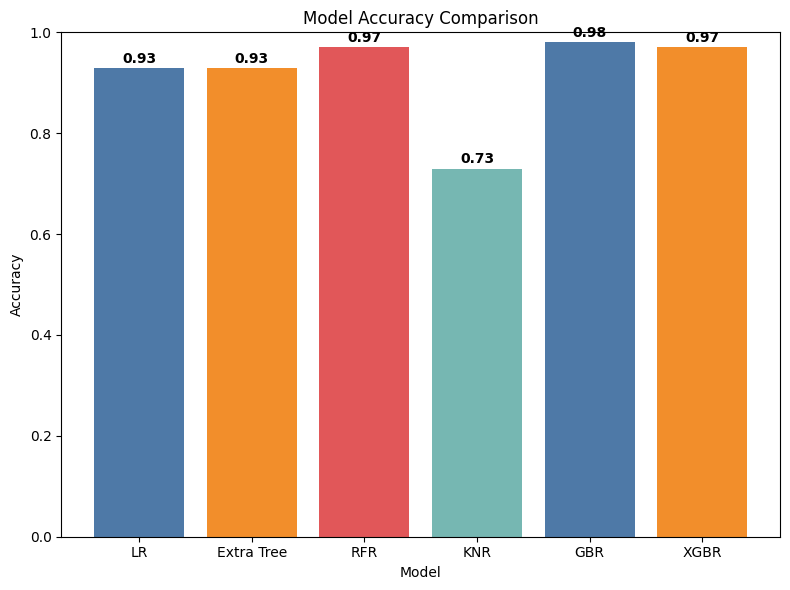

In [50]:
models = ["LR","Extra Tree", "RFR",'KNR','GBR','XGBR']
accuracies = [.93, 0.93, 0.97,0.73,0.98, 0.97 ]


plt.figure(figsize=(8, 6))  
plt.bar(models, accuracies, color=["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"])  

plt.title("Model Accuracy Comparison")  
plt.xlabel("Model")  
plt.ylabel("Accuracy")  
plt.ylim(0, 1)  


for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold')


plt.tight_layout()
plt.show()